<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/COVID_19_Previs%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_7cbf8aa255ec468a97ab036d55c121c3~mv2.png/v1/fill/w_408,h_86,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2013%404x.webp" height="75px"></p>


# COVID-19 - Previsões
A Organização Mundial da Saúde - Em 31 de dezembro de 2019, a OMS foi alertada sobre vários casos de pneumonia na cidade de Wuhan, província de Hubei, na China. Sendo um vírus completamente novo, causou grande preocupação em todos os lugares do planeta, pois não sabemos como ele afeta as pessoas.

<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_c6f54872f8fc4e2599f9a4d6b45498da~mv2.gif" height="200px"></p>
<p></p>

Portanto, as informações diárias das pessoas afetadas podem fornecer algumas informações interessantes quando disponibilizadas para a comunidade mais ampla de ciência de dados.

- Link para o desafio [Novos Casos](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)
- Notebook Adaptado Jones - IA Expert 
- [*DataSet*](https://github.com/jvataidee/kangle_COVID19_previsao-de-casos/blob/master/covid_19_data.csv) de novos casos até o dia 01/22/2020

Desta forma iremos utilizar de regreçõs lineares, para construir modelos preditivos de casos de mortes pela doença.

# Importação das bibliotecas

In [ ]:
# Importação das bibliotecas
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Importação da bases de dados

In [ ]:
df = "https://raw.githubusercontent.com/jvataidee/kangle_COVID19_previsao-de-casos/master/covid_19_data.csv"
covid = pd.read_csv(df)
covid = covid.drop(columns =["SNo"])

In [ ]:
covid.shape

(29426, 7)

In [ ]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df_brasil = covid[covid['Country/Region'] == 'Brazil']
df_brasil.shape

(253, 7)

In [ ]:
df_brasil.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0


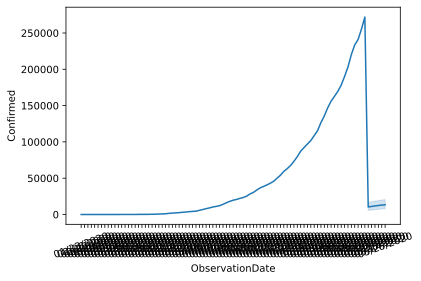

In [ ]:
sns.lineplot(df_brasil['ObservationDate'], df_brasil['Confirmed'])
plt.xticks(rotation = 20);

Notado uma pequena queda no final do gráfico, devido ao momento de alimentação do *dataset*, o que não vai alterar essa primeira parte da pesquisa.

In [ ]:
#Agrupamento do numero de casos, mortes e recuperação por dia
df_sum = covid.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

In [ ]:
df_sum.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [ ]:
df_sum.tail()

,ObservationDate,Confirmed,Deaths,Recovered
120,05/21/2020,5102424.0,332924.0,1948739.0
121,05/22/2020,5210817.0,338160.0,2056643.0
122,05/23/2020,5310362.0,342097.0,2112185.0
123,05/24/2020,5407613.0,345059.0,2168563.0
124,05/25/2020,5495061.0,346232.0,2231738.0


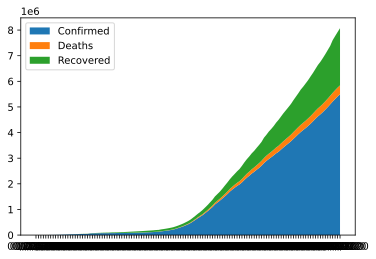

In [ ]:
plt.stackplot(df_sum['ObservationDate'], [df_sum['Confirmed'], df_sum['Deaths'], df_sum['Recovered']],
              labels = ['Confirmed', 'Deaths', 'Recovered'])
plt.legend(loc = 'upper left');

Então é notado que nesta época os casos confirmados estavam menores que os demais.

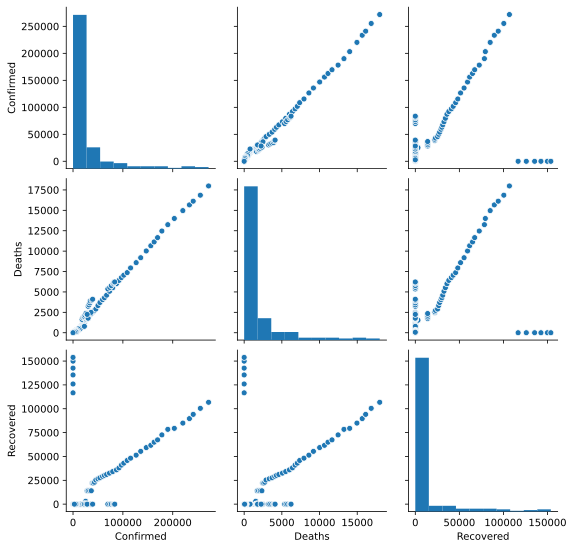

In [ ]:
sns.pairplot(df_brasil);

## Covid-19 line_list_data

In [ ]:
df2 = "https://raw.githubusercontent.com/jvataidee/kangle_COVID19_previsao-de-casos/master/datasets_494724_1188660_COVID19_line_list_data.csv"

In [ ]:
line_list_df = pd.read_csv(df2)
line_list_df.shape

(1085, 27)

In [ ]:
line_list_df.head(2)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN


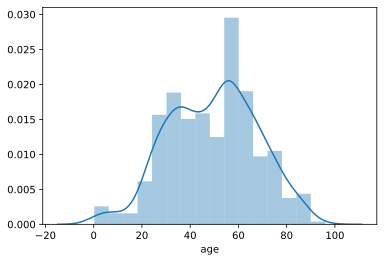

In [ ]:
sns.distplot(line_list_df['age']);

# Previsões de mortes por COVID-19

## Preparação da base de dados

In [ ]:
df3 =  'https://raw.githubusercontent.com/jvataidee/kangle_COVID19_previsao-de-casos/master/datasets_494724_1194097_time_series_covid_19_deaths.csv'
deaths_df = pd.read_csv(df3)

In [ ]:
deaths_df.shape

(266, 131)

In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4


In [ ]:
deaths_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,5,5,5,5,5,6,7,7,7,7,7,8,8,8,8,8,8,11,12,12
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,4,5,5,7,7,8,9,10,12,12,15,18,20,20,28,30,33,33,39,42,44,49,53
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,5,8,12,12,20,20,21,21,23,29,33,36,39,41,41,41,44,44,44,46,46,47,47
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
deaths_df[deaths_df['Country/Region'] == 'Brazil']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2354,2462,2587,2741,2906,3331,3704,4057,4286,4603,5083,5513,6006,6412,6761,7051,7367,7938,8588,9190,10017,10656,11123,11653,12461,13240,13999,14962,15662,16118,16853,17983,18859,20047,21048,22013,22666,23473,24512,25598


In [ ]:
columns = deaths_df.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20',
       '5/24/20', '5/25/20', '5/26/20', '5/27/20'],
      dtype='object', length=131)

In [ ]:
deaths_df = deaths_df.loc[:, columns[4]:columns[-1]]

In [ ]:
deaths_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4


In [ ]:
deaths_df.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/18/20', '5/19/20', '5/20/20', '5/21/20', '5/22/20', '5/23/20',
       '5/24/20', '5/25/20', '5/26/20', '5/27/20'],
      dtype='object', length=127)

In [ ]:
len(deaths_df.keys())

127

In [ ]:
deaths_df['1/22/20'].sum()

17

In [ ]:
deaths_df['3/26/20'].sum()

24788

In [ ]:
dates = deaths_df.keys()
y = []
for i in dates:
  #print(i)
  y.append(deaths_df[i].sum())

In [ ]:
len(y)

127

In [ ]:
type(y)

list

In [ ]:
y = np.array(y).reshape(-1,1)

In [ ]:
y.shape

(127, 1)

In [ ]:
X = np.arange(len(dates)).reshape(-1,1)

In [ ]:
X.shape

(127, 1)

In [ ]:
forecast = np.arange(len(dates) + 10).reshape(-1,1)

In [ ]:
forecast.shape

(137, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = False)

In [ ]:
X_train.shape

(107, 1)

In [ ]:
y_train.shape

(107, 1)

In [ ]:
X_test.shape

(20, 1)

In [ ]:
y_test.shape

(20, 1)

## Regressão polinomial

### Construção do modelo

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape

(107, 5)

In [ ]:
X_test_poly.shape

(20, 5)

In [ ]:
X_test_poly

array([[1.00000000e+00, 1.07000000e+02, 1.14490000e+04, 1.22504300e+06,
        1.31079601e+08],
       [1.00000000e+00, 1.08000000e+02, 1.16640000e+04, 1.25971200e+06,
        1.36048896e+08],
       [1.00000000e+00, 1.09000000e+02, 1.18810000e+04, 1.29502900e+06,
        1.41158161e+08],
       [1.00000000e+00, 1.10000000e+02, 1.21000000e+04, 1.33100000e+06,
        1.46410000e+08],
       [1.00000000e+00, 1.11000000e+02, 1.23210000e+04, 1.36763100e+06,
        1.51807041e+08],
       [1.00000000e+00, 1.12000000e+02, 1.25440000e+04, 1.40492800e+06,
        1.57351936e+08],
       [1.00000000e+00, 1.13000000e+02, 1.27690000e+04, 1.44289700e+06,
        1.63047361e+08],
       [1.00000000e+00, 1.14000000e+02, 1.29960000e+04, 1.48154400e+06,
        1.68896016e+08],
       [1.00000000e+00, 1.15000000e+02, 1.32250000e+04, 1.52087500e+06,
        1.74900625e+08],
       [1.00000000e+00, 1.16000000e+02, 1.34560000e+04, 1.56089600e+06,
        1.81063936e+08],
       [1.00000000e+00, 1.1700

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Previsões

In [ ]:
poly_test_pred = regressor.predict(X_test_poly)
poly_test_pred

array([[281886.59844666],
       [287494.84147562],
       [292937.4881555 ],
       [298200.59868009],
       [303269.94484538],
       [308131.01004952],
       [312768.98929291],
       [317168.78917809],
       [321315.02790985],
       [325192.03529514],
       [328783.85274312],
       [332074.23326514],
       [335046.64147476],
       [337684.25358771],
       [339969.95742194],
       [341886.35239759],
       [343415.74953699],
       [344540.17146468],
       [345241.35240738],
       [345500.73819401]])

In [ ]:
y_test

array([[274898],
       [279311],
       [282709],
       [286330],
       [291942],
       [297197],
       [302418],
       [307666],
       [311781],
       [315185],
       [318481],
       [323285],
       [328115],
       [332924],
       [338234],
       [342214],
       [345059],
       [346232],
       [350453],
       [355629]])

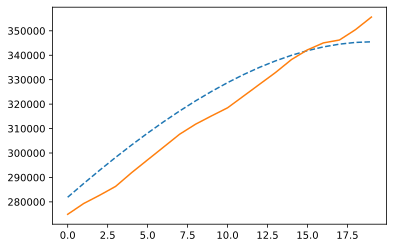

In [ ]:
plt.plot(poly_test_pred, linestyle = 'dashed')
plt.plot(y_test);

In [ ]:
print('MAE:', mean_absolute_error(poly_test_pred, y_test))
print('MSE:', mean_squared_error(poly_test_pred, y_test))
print('RMSE:', np.sqrt(mean_absolute_error(poly_test_pred, y_test)))

MAE: 7522.544891039166
MSE: 69512083.32094584
RMSE: 86.73260569727607


In [ ]:
forecast.shape

(137, 1)

In [ ]:
X_train_all = poly.transform(forecast)
X_train_all.shape

(137, 5)

In [ ]:
poly_pred_all = regressor.predict(X_train_all)
len(poly_pred_all)

137

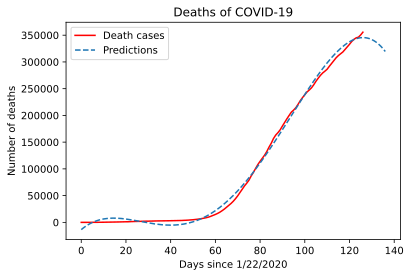

In [ ]:
plt.plot(forecast[:-10], y, color='red')
plt.plot(forecast, poly_pred_all, linestyle='dashed')
plt.title('Deaths of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.legend(['Death cases', 'Predictions']);